# Load Library 

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Load Data 

In [2]:
BASE_DIR = f'../Datasets/mpii_human_pose_v1'
train_df = pd.read_csv(BASE_DIR + f'/mpii_human_pose_v1_u12_2/train_dataset.csv')
val_df = pd.read_csv(BASE_DIR + f'/mpii_human_pose_v1_u12_2/test_dataset.csv')

In [3]:
train_df.head()

,name,label,width,height,box_width,box_height,x1,y1,x2,y2,test
0,015601864.jpg,0,1280,720,14,28,613,380,627,408,0
1,015601864.jpg,1,1280,720,14,28,609,255,623,283,0
2,015601864.jpg,2,1280,720,14,28,566,171,580,199,0
3,015601864.jpg,3,1280,720,14,28,640,174,654,202,0
4,015601864.jpg,4,1280,720,14,28,654,207,668,235,0


# Make train.txt 

In [4]:
train_df_ = train_df.loc[:, ['name', 'x1', 'y1', 'x2', 'y2', 'label']]
val_df_ = val_df.loc[:, ['name', 'x1', 'y1', 'x2', 'y2', 'label']]

In [5]:
# df = pd.concat([train_df_, val_df_], axis=0, ignore_index=True)

In [6]:
BASE_DIR + '/images/' + train_df_['name'][0]

'../Datasets/mpii_human_pose_v1/images/015601864.jpg'

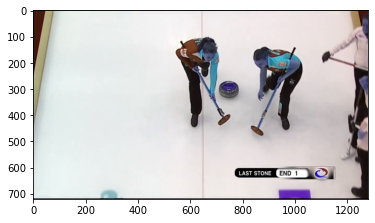

In [7]:
img = cv2.imread(BASE_DIR + '/images/' + train_df_['name'][0])
plt.imshow(img)

In [8]:
# df['name'] = BASE_DIR + '/images/' + df['name']

In [9]:
# df.head()

In [10]:
# train_df_['name'] = BASE_DIR + '/images/' + train_df_['name']
# val_df_['name'] = BASE_DIR + '/images/' + val_df_['name']

In [11]:
file = open(f'train.txt', 'w')
element = ''
name = ''

for i in tqdm(range(train_df_.shape[0])):
    if name == train_df_['name'][i]:
        element += f' {train_df_.iloc[i, 1]},{train_df_.iloc[i, 2]},{train_df_.iloc[i, 3]},{train_df_.iloc[i, 4]},{train_df_.iloc[i, 5]}'
    elif name != train_df_['name'][i]:
        file.write(element+'\n')
        element = f'{train_df_.iloc[i, 0]} {train_df_.iloc[i, 1]},{train_df_.iloc[i, 2]},{train_df_.iloc[i, 3]},{train_df_.iloc[i, 4]},{train_df_.iloc[i, 5]}'
    else: print('ERROR')
    name = train_df_['name'][i]

file.close()

100%|██████████| 192148/192148 [00:12<00:00, 15581.66it/s]


In [12]:
file = open(f'val.txt', 'w')
element = ''
name = ''

for i in tqdm(range(val_df_.shape[0])):
    if name == val_df_['name'][i]:
        element += f' {val_df_.iloc[i, 1]},{val_df_.iloc[i, 2]},{val_df_.iloc[i, 3]},{val_df_.iloc[i, 4]},{val_df_.iloc[i, 5]}'
    elif name != val_df_['name'][i]:
        file.write(element+'\n')
        element = f'{val_df_.iloc[i, 0]} {val_df_.iloc[i, 1]},{val_df_.iloc[i, 2]},{val_df_.iloc[i, 3]},{val_df_.iloc[i, 4]},{val_df_.iloc[i, 5]}'
    else: print('ERROR')
    name = val_df_['name'][i]

file.close()

100%|██████████| 82790/82790 [00:05<00:00, 15549.42it/s]


# Verify 

In [13]:
train_test = open(f'train.txt', 'r')
t_list = train_test.readlines()
val_test = open(f'val.txt', 'r')
v_list = val_test.readlines()

In [14]:
len(t_list), len(v_list)

(12142, 5230)